In [1]:
from letter import gxl2Graph, Letter
import json
import networkx as nx
import matplotlib.pyplot as plt
from GMD import GMD
import numpy as np
from ggd import ggd
from graph import Point, Graph

In [7]:
g1 = gxl2Graph(json.load(open('../data/Letter/json/LOW/AP1_0041.json')), 'u')
g2 = gxl2Graph(json.load(open('../data/Letter/PROTOTYPE/A_prototype.json')), 'v')

G1, G2 = g1.toNX(), g2.toNX()
cost, flow, D = GMD(g1, g2, 1, 1, 1)
for u in flow.values():
    for v, w in u.items():
        u[v] = { 'weight': w } 
F = nx.DiGraph(flow)
F.remove_node("eps1")
F.remove_node("eps2")
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w == 0])

In [10]:
c1, f = ggd(g2, g1, 1, 1)
H = nx.DiGraph(f)

In [11]:
pos1 = nx.get_node_attributes(G1,  'coords')
pos2 = nx.get_node_attributes(G2,  'coords')

#pos1 = { u.label: u.coords for u in g1.vertices }
#pos2 = { u.label: u.coords for u in g2.vertices }

for k in pos2.keys():
        pos2[k] = np.add( pos2[k], (3,0))
pos = pos1 | pos2
#pos = {"eps1": (0, 3), "eps2": (0, -3)}

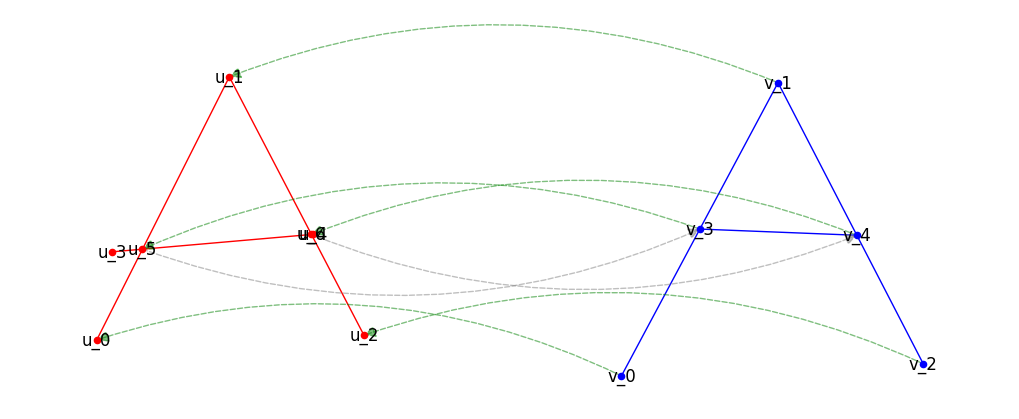

In [12]:
fig = plt.figure(figsize=(10, 4))
nx.draw(G1, pos1, edge_color = "red", node_color = "red", node_size = 20, with_labels = True)
nx.draw(G2, pos2, edge_color = "blue", node_color = "blue", node_size = 20, with_labels = True)
nx.draw(F, pos, edge_color = "gray", width = 1, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.2", arrowsize = 17)
nx.draw(H, pos, edge_color = "green", width = 1, style = '--', node_size = 0, alpha = 0.5, connectionstyle="arc3, rad=0.2", arrowsize = 17)
# 
# weights = nx.get_edge_attributes(F, 'weight').values()
# nx.draw(F, pos, **options, width=list(weights))

In [8]:
c1, cost

(2.624662007193695, 8.0)

In [2]:
p1 = Point((2,2), 'u_1')
p2 = Point((0,0), 'u_2')
p3 = Point((2,0), 'u_3')
p4 = Point((0,2), 'u_4')
p5 = Point((1,1), 'u_5')

q1 = Point((0,0), 'v_1')
q2 = Point((2,2), 'v_2')
q3 = Point((0,2), 'v_3')
q4 = Point((2,0), 'v_4')
q5 = Point((1,1), 'v_5')

In [3]:
g1 = Graph([p1, p2, p3, p4, p5], [[p1, p4], [p2, p3], [p1, p5], [p2, p5]])

In [4]:
g2 = Graph([q1, q2, q3, q4, q5], [[q1, q3], [q1, q5], [q5, q2], [q2, q4]])

In [5]:
ggd(g1, g2, 1, 1)

(5.656854249492381,
 [('u_1', 'v_1'),
  ('u_2', 'v_2'),
  ('u_3', 'v_4'),
  ('u_4', 'v_3'),
  ('u_5', 'v_5')])

In [9]:
c,d, G = GMD(g1, g2, 1, 1, 1)

In [10]:
c, d

(0.0,
 {'u_1': {'v_1': 0, 'v_2': 1, 'v_3': 0, 'v_4': 0, 'v_5': 0, 'eps2': 0},
  'u_2': {'v_1': 1, 'v_2': 0, 'v_3': 0, 'v_4': 0, 'v_5': 0, 'eps2': 0},
  'u_3': {'v_1': 0, 'v_2': 0, 'v_3': 0, 'v_4': 1, 'v_5': 0, 'eps2': 0},
  'u_4': {'v_1': 0, 'v_2': 0, 'v_3': 1, 'v_4': 0, 'v_5': 0, 'eps2': 0},
  'u_5': {'v_1': 0, 'v_2': 0, 'v_3': 0, 'v_4': 0, 'v_5': 1, 'eps2': 0},
  'eps1': {'v_1': 0, 'v_2': 0, 'v_3': 0, 'v_4': 0, 'v_5': 0, 'eps2': 5},
  'v_1': {},
  'v_2': {},
  'v_3': {},
  'v_4': {},
  'v_5': {},
  'eps2': {}})

In [11]:
nx.to_dict_of_dicts(G)

{'u_1': {'v_1': {'weight': 5},
  'v_2': {'weight': 0},
  'v_3': {'weight': 5},
  'v_4': {'weight': 5},
  'v_5': {'weight': 5},
  'eps2': {'weight': 3}},
 'u_2': {'v_1': {'weight': 0},
  'v_2': {'weight': 5},
  'v_3': {'weight': 5},
  'v_4': {'weight': 3},
  'v_5': {'weight': 3},
  'eps2': {'weight': 3}},
 'u_3': {'v_1': {'weight': 3},
  'v_2': {'weight': 5},
  'v_3': {'weight': 5},
  'v_4': {'weight': 0},
  'v_5': {'weight': 2},
  'eps2': {'weight': 2}},
 'u_4': {'v_1': {'weight': 5},
  'v_2': {'weight': 5},
  'v_3': {'weight': 0},
  'v_4': {'weight': 5},
  'v_5': {'weight': 2},
  'eps2': {'weight': 2}},
 'u_5': {'v_1': {'weight': 3},
  'v_2': {'weight': 5},
  'v_3': {'weight': 2},
  'v_4': {'weight': 2},
  'v_5': {'weight': 0},
  'eps2': {'weight': 3}},
 'eps1': {'v_1': {'weight': 3},
  'v_2': {'weight': 3},
  'v_3': {'weight': 2},
  'v_4': {'weight': 2},
  'v_5': {'weight': 3},
  'eps2': {'weight': 0}},
 'v_1': {},
 'v_2': {},
 'v_3': {},
 'v_4': {},
 'v_5': {},
 'eps2': {}}